In [ ]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np

In [ ]:
x=np.array(range(1,102))
print(x)


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101]


In [ ]:
a=[5,5,6,6]
print(np.unique(a))
len(np.unique(a))

[5 6]


2

In [ ]:
#Decision Variable: Q
def CollectI(Q):
  costI=0
  costr=5
  costd=25
  cardsbought=np.random.choice(x,size=Q)
  nhit=len(np.unique(cardsbought))
  nmissed=101-nhit
  costI=costr*Q+costd*nmissed
  return costI


In [ ]:
CollectI(20)

2125

In [ ]:
def SimCollectI(Q,S=1000):
  #Set the seed for reproducibility
  np.random.seed(5566)
  costI=np.empty(S)
  for s in range(S):
    costI[s]=CollectI(Q)
  return costI


In [ ]:
res=SimCollectI(Q=163,S=1000)
print(res[0:19])

[1265. 1315. 1390. 1290. 1340. 1490. 1190. 1440. 1215. 1465. 1415. 1265.
 1140. 1465. 1415. 1315. 1315. 1340. 1415.]


In [ ]:
sav=2525-res
print(sav[0:19])

[1260. 1210. 1135. 1235. 1185. 1035. 1335. 1085. 1310. 1060. 1110. 1260.
 1385. 1060. 1110. 1210. 1210. 1185. 1110.]


In [ ]:
stats.describe(sav)

DescribeResult(nobs=1000, minmax=(935.0, 1460.0), mean=1212.85, variance=6303.180680680681, skewness=-0.010604790617347561, kurtosis=-0.04248282965578687)

In [ ]:
Qvals=np.array(range(1,506))
savingsI=np.empty(len(Qvals))
print(len(Qvals))
print(len(savingsI))

for i in Qvals:
  resi=SimCollectI(Q=Qvals[i-1])
  savi=2525-resi
  savingsI[i-1]=np.mean(savi)
  if (np.remainder(i,50)==0):
    print("Qval=",i)

505
505
Qval= 50
Qval= 100
Qval= 150
Qval= 200
Qval= 250
Qval= 300
Qval= 350
Qval= 400
Qval= 450
Qval= 500


163


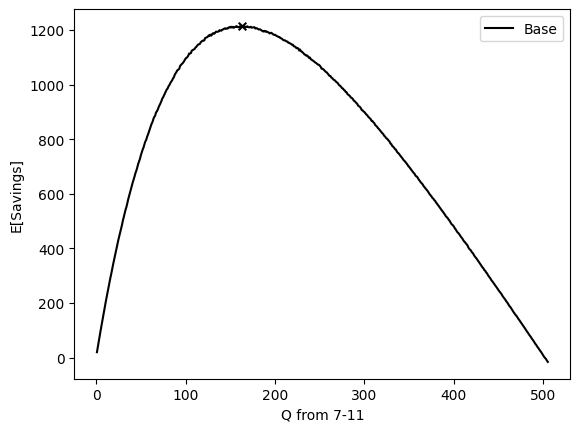

In [ ]:
#Plot the expected profits from each Q candidates
QI=np.argmax(savingsI)
print(QI)
plt.plot(Qvals,savingsI,color='Black',label='Base')
plt.scatter(QI,max(savingsI),s=30,color='black',marker='x')
plt.xlabel("Q from 7-11")
plt.ylabel("E[Savings]")
plt.title("")
plt.legend()
plt.show()


In [ ]:
#Exchange allowed
#Probability of a successful exchange
pexchange=0.3

def CollectII(Q):
  costII=0
  costr=5
  costd=25
  cardsbought=np.random.choice(x,size=Q)
  nhit=len(np.unique(cardsbought))
  nleft=Q-nhit
  if nleft==0:
    nexhange=0
    nmissed=101-nhit
  else:
    nexchange=np.random.binomial(min(101-nhit,nleft),pexchange,size=1)
    nmissed=101-nhit-nexchange
  costII=costr*Q+costd*nmissed
  return costII

CollectII(1)

2505

In [ ]:
def SimCollectII(Q,S=1000):
  #Set the seed for reproducibility
  np.random.seed(5566)
  costII=np.empty(S)
  for s in range(S):
    costII[s]=CollectII(Q)
  return costII

res=SimCollectII(Q=20,S=1000)
sav=2525-res
print(sav[0:19])

[375. 375. 375. 400. 350. 375. 375. 300. 375. 400. 375. 400. 375. 400.
 325. 350. 325. 400. 350.]


In [ ]:
Qvals=np.array(range(1,506))
savingsII=np.empty(len(Qvals))

for i in Qvals:
  resi=SimCollectII(Q=Qvals[i-1])
  savi=2525-resi
  savingsII[i-1]=np.mean(savi)
  if (np.remainder(i,50)==0):
    print("Qval=",i)

Qval= 50
Qval= 100
Qval= 150
Qval= 200
Qval= 250
Qval= 300
Qval= 350
Qval= 400
Qval= 450
Qval= 500


163
127


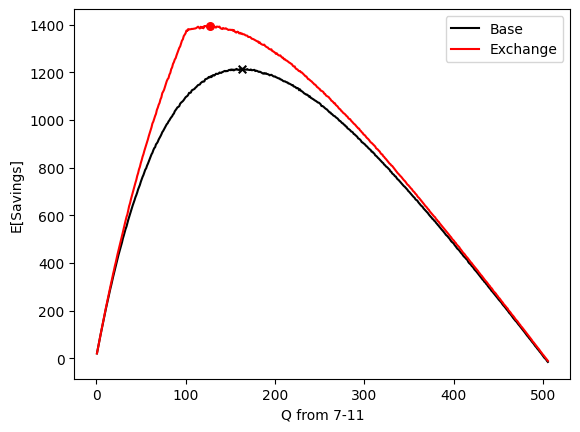

In [ ]:
QII=np.argmax(savingsII)
print(QI)
print(QII)
plt.plot(Qvals,savingsI,color='black',label='Base')
plt.plot(Qvals,savingsII,color='red',label='Exchange')
plt.scatter(QI,max(savingsI),s=30,color='black',marker='x')
plt.scatter(QII,max(savingsII),s=30,color='red',marker='o')
plt.xlabel("Q from 7-11")
plt.ylabel("E[Savings]")
plt.title("")
plt.legend()
plt.show()

In [ ]:
#Exchange & resell allowed
pexchange=0.3
presell=0.1

def CollectIII(Q):
  costIII=0
  costr=5
  costd=25
  cardsbought=np.random.choice(x,size=Q)
  nhit=len(np.unique(cardsbought))
  nleft=Q-nhit
  if nleft==0:
    nexchange=0
    nmissed=101-nhit
  else:
    nexchange=np.random.binomial(min(101-nhit,nleft),pexchange,size=1)
    nmissed=101-nhit-nexchange
  nleft=nleft-nexchange
  if nleft>0:
    nresell=np.random.binomial(nleft,presell,size=1)
  else:
    nresell=0
  costIII=costr*Q+costd*nmissed-costd*nresell
  return costIII

CollectIII(1)

2505

In [ ]:
def SimCollectIII(Q,S=1000):
  #Set the seed for reproducibility
  np.random.seed(5566)
  costIII=np.empty(S)
  for s in range(S):
    costIII[s]=CollectIII(Q)
  return costIII

res=SimCollectIII(Q=10,S=1000)
sav=2525-res
print(sav[0:19])

[175. 175. 175. 200. 200. 200. 200. 175. 175. 175. 200. 200. 175. 175.
 175. 200. 200. 200. 200.]


In [ ]:
Qvals=np.array(range(1,506))
savingsIII=np.empty(len(Qvals))

for i in Qvals:
  resi=SimCollectIII(Q=Qvals[i-1])
  savi=2525-resi
  savingsIII[i-1]=np.mean(savi)
  if (np.remainder(i,50)==0):
    print("Qval=",i)

Qval= 50
Qval= 100
Qval= 150
Qval= 200
Qval= 250
Qval= 300
Qval= 350
Qval= 400
Qval= 450
Qval= 500


163
127
182


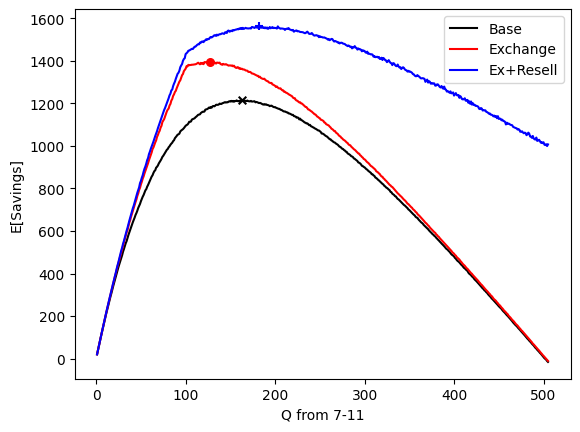

In [ ]:
QIII=np.argmax(savingsIII)
print(QI)
print(QII)
print(QIII)
plt.plot(Qvals,savingsI,color='black',label='Base')
plt.plot(Qvals,savingsII,color='red',label='Exchange')
plt.plot(Qvals,savingsIII,color='blue',label='Ex+Resell')
plt.scatter(QI,max(savingsI),s=30,color='black',marker='x')
plt.scatter(QII,max(savingsII),s=30,color='red',marker='o')
plt.scatter(QIII,max(savingsIII),s=30,color='blue',marker='+')
plt.xlabel("Q from 7-11")
plt.ylabel("E[Savings]")
plt.title("")
plt.legend()
plt.show()

In [ ]:
#Exchange & resell allowed
#Assuming resell price<dealer price & both are random
pexchange=0.3
presell=0.1

def CollectIV(Q):
  costIII=0
  costr=5
  #Dealer price is random now
  #costd=25
  cardsbought=np.random.choice(x,size=Q)
  nhit=len(np.unique(cardsbought))
  nleft=Q-nhit
  if nleft==0:
    nexchange=0
    nmissed=101-nhit
  else:
    nexchange=np.random.binomial(min(101-nhit,nleft),pexchange,size=1)
    nmissed=101-nhit-nexchange
  nleft=nleft-nexchange
  #
  if nleft>0:
    nresell=np.random.binomial(nleft,presell,size=1)
  else:
    nresell=0
  #
  if (nmissed>0 & nresell>0):
    revenue=np.random.choice(range(5,16),size=nresll)
    costdbuy=np.random.choice(range(15,31),size=nmissed)
    costIV=costr*Q+np.sum(costdbuy)-np.sum(revenue)
    return costIV
  #
  if (nmissed==0 & nresell>0):
    revenue=np.random.choice(range(5,16),size=nresll)
    costIV=costr*Q-np.sum(revenue)
    return costIV
  #
  if (nmissed>0 & nresell==0):
    costdbuy=np.random.choice(range(15,31),size=nmissed)
    costIV=costr*Q+np.sum(costdbuy)
    return costIV
  #
  if (nmissed==0 & nresell==0):
    costIV=costr*Q
    return costIV
  #
  #return costIV

CollectIV(0)

2221

In [ ]:
def SimCollectIV(Q,S=1000):
  #Set the seed for reproducibility
  np.random.seed(5566)
  costIV=np.empty(S)
  for s in range(S):
    costIV[s]=CollectIV(Q)
  return costIV

res=SimCollectIV(Q=1,S=1000)
sav=2525-res
print(sav[0:19])

[307. 172. 222. 247. 300. 259. 233. 322. 289. 261. 350. 286. 236. 252.
 226. 312. 305. 298. 206.]


In [ ]:
Qvals=np.array(range(1,506))
savingsIV=np.empty(len(Qvals))

for i in Qvals:
  resi=SimCollectIV(Q=Qvals[i-1])
  savi=2525-resi
  savingsIV[i-1]=np.mean(savi)
  if (np.remainder(i,50)==0):
    print("Qval=",i)

Qval= 50
Qval= 100
Qval= 150
Qval= 200
Qval= 250
Qval= 300
Qval= 350
Qval= 400
Qval= 450
Qval= 500


163
127
182
116


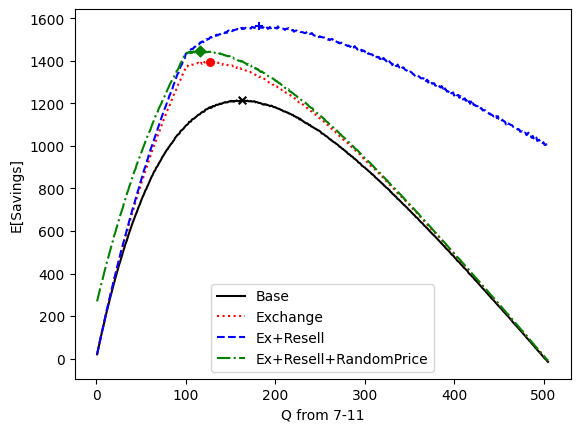

In [ ]:
QIV=np.argmax(savingsIV)
print(QI)
print(QII)
print(QIII)
print(QIV)
plt.figsize=(12,5)
plt.plot(Qvals,savingsI,color='black',label='Base',linestyle='solid')
plt.plot(Qvals,savingsII,color='red',label='Exchange',linestyle='dotted')
plt.plot(Qvals,savingsIII,color='blue',label='Ex+Resell',linestyle='dashed')
plt.plot(Qvals,savingsIV,color='green',label='Ex+Resell+RandomPrice',linestyle='dashdot')
plt.scatter(QI,max(savingsI),s=30,color='black',marker='x')
plt.scatter(QII,max(savingsII),s=30,color='red',marker='o')
plt.scatter(QIII,max(savingsIII),s=30,color='blue',marker='+')
plt.scatter(QIV,max(savingsIV),s=30,color='green',marker='D')
plt.xlabel("Q from 7-11")
plt.ylabel("E[Savings]")
plt.title("")
plt.legend()
plt.show()